<a href="https://colab.research.google.com/github/PRASAD88990/ds-algo/blob/main/mn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q kaggle


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prasadw123","key":"6b95fcd57b413da9e46f28e839fd6cdf"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d yelp-dataset/yelp-dataset

Dataset URL: https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset
License(s): other
100% 4.07G/4.07G [02:11<00:00, 43.1MB/s]
100% 4.07G/4.07G [02:11<00:00, 33.3MB/s]


In [7]:
!unzip  yelp-dataset.zip -d /content/yelp-dataset

Archive:  yelp-dataset.zip
  inflating: /content/yelp-dataset/Dataset_User_Agreement.pdf  
  inflating: /content/yelp-dataset/yelp_academic_dataset_business.json  
  inflating: /content/yelp-dataset/yelp_academic_dataset_checkin.json  
  inflating: /content/yelp-dataset/yelp_academic_dataset_review.json  
  inflating: /content/yelp-dataset/yelp_academic_dataset_tip.json  
  inflating: /content/yelp-dataset/yelp_academic_dataset_user.json  


In [10]:
import zipfile
import os

# Unzip the downloaded file
with zipfile.ZipFile('yelp-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# Move the dataset to Google Drive
!mv /content/dataset /content/drive/My\ Drive/dataset


In [8]:
import pandas as pd
import json

# Load the business data from the Yelp Dataset
with open('/content/yelp-dataset/yelp_academic_dataset_business.json', 'r', encoding='utf-8') as f:
    business_data = pd.DataFrame([json.loads(line) for line in f])

In [ ]:
business_data.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [ ]:
print(hotels['state'].unique())

['LA' 'PA' 'AZ' 'MO' 'TN' 'FL' 'CA' 'NV' 'ID' 'AB' 'NJ' 'IN' 'IL' 'DE'
 'VI']


In [44]:
# Filter businesses that are categorized as hotels
hotels = business_data[(business_data['categories'].str.contains('Hotels', na=False) ) ]

In [ ]:
print(hotels['city'].unique())

['Kenner' 'New Orleans' 'Kennett Square' 'Tucson' 'Saint Louis'
 'Philadelphia' 'Nashville' 'Madeira Beach' 'Santa Barbara' 'Reno'
 'Terra Ceia' 'Boise' 'Edmonton' 'Norristown' 'Mt. Juliet' 'Woodstown'
 'Malvern' 'Spring Hill' 'Eagle' 'Tampa Bay' 'Bellmawr' 'Indianapolis'
 'New Port Richey' 'King Of Prussia' 'Marrero' 'Clearwater'
 'King of Prussia' 'Tampa' 'Cahokia' 'Newark' 'Treasure Island' 'Lutz'
 'Clearwater Beach' 'St Pete Beach' 'North Redington Beach' 'Ridley Park'
 'Mount Laurel' 'Goleta' 'Souderton' 'Berkeley' 'West Chester'
 'Mount Holly' 'Abington' 'Franklin' 'Pontoon Beach' 'Belleair' 'Frazer'
 'Erdenheim' 'Sparks' 'Deptford' 'Whitestown' 'Smyrna' 'Saint Petersburg'
 'Seffner' 'Brentwood' 'Conshohocken' 'Columbus' 'St Louis' 'Dover'
 'Plymouth Meeting' 'Brooklawn' 'St Petersburg' 'Carmel' 'Fishers'
 'St. Louis' 'Wesley Chapel' 'Colmar' 'Tarpon Springs' 'Wilmington'
 'Bridgeton' 'Valley Forge' 'Hilltown' 'Phoenixville' 'Treasure Is'
 'Mount Royal' 'Carpinteria' 'Brownsburg'

In [72]:
# Filter for hotels
hotels = business_data[business_data['categories'].str.contains('Hotels', na=False)]

# Define a function to check for the attribute, handling missing values
def has_r(row):
  try:
    attributes = row['attributes']
    if attributes is not None and isinstance(attributes, dict):
      return 'RestaurantsPriceRange2' in attributes
    else:
      return False
  except (KeyError, TypeError):
    return False

# Apply the function to filter the hotels DataFrame
hotels_w = hotels[hotels.apply(has_r, axis=1)]

# Explore the resulting DataFrame
# print(hotels_with_restaurants.head())

In [99]:
# Filter out hotels with 'transport' or 'distilleries' in their categories
hotels_w = hotels_w[~hotels_w['categories'].str.contains('Transport|Distilleries', na=False, case=False)]

print(hotels_w.shape[0]) # To check the number of hotels after filtering

2854


In [114]:
restaurants = business_data[business_data['categories'].str.contains('Restaurants', na=False)]

In [115]:
cuisine_type = "Italian"
filtered_restaurants = restaurants[restaurants['categories'].str.contains(cuisine_type, case=False, na=False)]

In [116]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in km
    R = 6371.0

    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)

    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

# Example coordinates (latitude, longitude)
target_lat = 29.947256  # Example: n o
target_lon = -90.091225



# Calculate distance from target location for each hotel
hotels_w.loc[:, 'distance_km'] = hotels_w.apply(lambda row: haversine(target_lat, target_lon, row['latitude'], row['longitude']), axis=1)

filtered_restaurants['distance_km'] = filtered_restaurants.apply(
    lambda row: haversine(target_lat, target_lon, row['latitude'], row['longitude']), axis=1
)
filtered_restaurants['distance_km'] = filtered_restaurants.apply(
    lambda row: haversine(target_lat, target_lon, row['latitude'], row['longitude']), axis=1
)
# Filter hotels within a certain radius, e.g., 10 km
radius_km = 2
nearby_hotels = hotels_w[hotels_w['distance_km'] <= radius_km]
nearby_restaurants = filtered_restaurants[filtered_restaurants['distance_km'] <= radius_km]


<ipython-input-116-51a2ae7e13f8>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_restaurants['distance_km'] = filtered_restaurants.apply(
<ipython-input-116-51a2ae7e13f8>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_restaurants['distance_km'] = filtered_restaurants.apply(


In [117]:
def display_hotels(hotels):
    for _, row in hotels.iterrows():
        print(f"Name: {row['name']}")
        print(f"Address: {row['address']}, {row['city']}, {row['state']}, {row['postal_code']}")
        print(f"Rating: {row['stars']} stars")
        print(f"Distance: {row['distance_km']:.2f} km")
        print("-" * 40)

# Display nearby hotels
display_hotels(nearby_hotels)


NameError: name 'display_restaurants' is not defined

In [118]:
def display_restaurants(restaurants):
    for _, row in restaurants.iterrows():
        print(f"Name: {row['name']}")
        print(f"Address: {row['address']}, {row['city']}, {row['state']}, {row['postal_code']}")
        print(f"Rating: {row['stars']} stars")
        print(f"Distance: {row['distance_km']:.2f} km")
        print("-" * 40)

# Display nearby restaurants of the selected cuisine
display_restaurants(nearby_restaurants)


Name: Altamura
Address: 2127 Prytania St, New Orleans, LA, 70115
Rating: 3.5 stars
Distance: 1.91 km
----------------------------------------
Name: Leonardo Trattoria
Address: 709 Saint Charles Ave, New Orleans, LA, 70130
Rating: 2.5 stars
Distance: 1.91 km
----------------------------------------
Name: Pizzicare
Address: 3001 Tulane Ave, New Orleans, LA, 70119
Rating: 3.0 stars
Distance: 1.85 km
----------------------------------------
Name: Union Station Pub & Grill
Address: 735 St Joseph St, New Orleans, LA, 70016
Rating: 4.0 stars
Distance: 1.78 km
----------------------------------------
Name: Big Pie Pizza
Address: 407 Baronne St, New Orleans, LA, 70112
Rating: 3.0 stars
Distance: 1.80 km
----------------------------------------
Name: Dolce Vita Pizzeria
Address: 1205 Saint Charles Ave, Ste C, New Orleans, LA, 70130
Rating: 4.0 stars
Distance: 1.78 km
----------------------------------------
Name: Copeland's Cheesecake Bistro
Address: 2001 Saint Charles Ave, New Orleans, LA, 7013

In [109]:
restaurants = business_data[business_data['categories'].str.contains('Restaurants', na=False)]

In [110]:
restaurants.shape[0]

52268

NameError: name 'filtered_restaurants' is not defined

In [104]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [119]:
import streamlit as st

def main():
    st.title("Hotel Suggestions Based on Location")

    lat = st.number_input("Enter Latitude", value=36.1699)
    lon = st.number_input("Enter Longitude", value=-115.1398)
    radius_km = st.slider("Search Radius (km)", 1, 20, 10)

    if st.button("Search"):
        nearby_hotels = hotels[hotels.apply(lambda row: haversine(lat, lon, row['latitude'], row['longitude']) <= radius_km, axis=1)]
        display_hotels(nearby_hotels)
        ##
    st.title("Restaurant Finder by Cuisine")

    lat = st.number_input("Enter Latitude", value=36.1699)
    lon = st.number_input("Enter Longitude", value=-115.1398)
    radius_km = st.slider("Search Radius (km)", 1, 20, 10)
    cuisine_type = st.text_input("Enter Cuisine Type", "Italian")

    if st.button("Search"):
        # Filter for the specified cuisine
        filtered_restaurants = restaurants[restaurants['categories'].str.contains(cuisine_type, case=False, na=False)]

        # Further filter by distance from the specified location
        filtered_restaurants['distance_km'] = filtered_restaurants.apply(
            lambda row: haversine(lat, lon, row['latitude'], row['longitude']), axis=1
        )
        nearby_restaurants = filtered_restaurants[filtered_restaurants['distance_km'] <= radius_km]

        # Display the results
        display_restaurants(nearby_restaurants)



if __name__ == "__main__":
    main()


In [ ]:
#####

In [75]:
pd.set_option('display.max_colwidth', 1000)

In [83]:
hotels_in_city = hotels_w[hotels_w['city'].str.contains('New Orleans', na=False)]

In [94]:
h=hotels_w[hotels_w['name'].str.contains('Roulaison Distilling', na=False)]

In [95]:
h

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,distance_km
7161,hQ-QZPwMyFEUDPm8opitvA,Roulaison Distilling,"2727 S Broad St, Ste 103",New Orleans,LA,70125,29.951375,-90.100141,4.5,24,1,"{'WiFi': 'u'free'', 'RestaurantsTakeOut': 'False', 'BusinessAcceptsBitcoin': 'False', 'GoodForKids': 'False', 'WheelchairAccessible': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '2', 'NoiseLevel': 'u'quiet'', 'HappyHour': 'False', 'BikeParking': 'True', 'Caters': 'False', 'RestaurantsDelivery': 'False', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}'}","Food, Distilleries, Hotels & Travel, Tours","{'Monday': '0:0-0:0', 'Tuesday': '12:0-18:0', 'Wednesday': '12:0-18:0', 'Thursday': '12:0-18:0', 'Friday': '12:0-18:0', 'Saturday': '12:0-18:0'}",0.973515


hotels_in_city

In [87]:
hotels_in_city.shape[0]


301

In [88]:
hotels_in_city

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,distance_km
34,w_AMNoI1iG9eay7ncmc67w,River 127,100 Iberville St,New Orleans,LA,70130,29.951359,-90.064672,3.0,12,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi': ''no'', 'RestaurantsPriceRange2': '2'}","Event Planning & Services, Hotels, Hotels & Travel",None,2.598706
155,hUQ9Z7kQeabvhPOAQOVV1A,Rathbone Mansions,1244 Esplanade Ave,New Orleans,LA,70116,29.967055,-90.065828,3.5,67,1,"{'WiFi': 'u'free'', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '2'}","Hotels, Hotels & Travel, Bed & Breakfast, Event Planning & Services",None,3.291366
1009,QGTvT3wucl1UKZgxTRGStQ,Hotel De L'eau Vive,315 Tchoupitoulas St,New Orleans,LA,70130,29.949712,-90.066922,2.5,28,1,"{'WiFi': 'u'free'', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '3'}","Event Planning & Services, Hotels, Hotels & Travel",None,2.357455
2209,cxupofYLq46bxBHpKyFwsQ,Wyndham New Orleans - French Quarter,124 Royal Street,New Orleans,LA,70130,29.953713,-90.068526,3.0,266,1,"{'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '2', 'WiFi': 'u'free''}","Event Planning & Services, Hotels, Hotels & Travel","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'Wednesday': '0:0-0:0', 'Thursday': '0:0-0:0', 'Friday': '0:0-0:0', 'Saturday': '0:0-0:0', 'Sunday': '0:0-0:0'}",2.301793
2365,hkh5iyDeGLNhu-JUQFRE1Q,Royal Sonesta New Orleans,300 Bourbon St,New Orleans,LA,70130,29.955761,-90.067887,3.5,492,1,"{'GoodForKids': 'False', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': True, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'Alcohol': 'u'full_bar'', 'RestaurantsReservations': 'True', 'RestaurantsPriceRange2': '3', 'RestaurantsGoodForGroups': 'True', 'OutdoorSeating': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'False', 'RestaurantsAttire': 'u'casual'', 'BusinessParking': '{'garage': True, 'street': False, 'validated': False, 'lot': False, 'valet': True}', 'WiFi': 'u'free'', 'Caters': 'True', 'DogsAllowed': 'True', 'HasTV': 'True', 'RestaurantsDelivery': 'False', 'NoiseLevel': 'u'average''}","Event Planning & Services, Hotels & Travel, Hotels, Restaurants, Bed & Breakfast","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'Wednesday': '0:0-0:0', 'Thursday': '0:0-0:0', 'Friday': '0:0-0:0', 'Saturday': '0:0-0:0', 'Sunday': '0:0-0:0'}",2.439258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148906,M9OmBqomgvMt0SH5G4prBw,Andrew Jackson Hotel,919 Royal St,New Orleans,LA,70116,29.960104,-90.063090,3.0,89,1,"{'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '2', 'WiFi': 'u'free''}","Hotels & Travel, Event Planning & Services, Hotels, Bed & Breakfast","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'Wednesday': '0:0-0:0', 'Thursday': '0:0-0:0', 'Friday': '0:0-0:0', 'Saturday': '0:0-0:0', 'Sunday': '0:0-0:0'}",3.064014
149246,GMAxU4HKs5Bt7YfxdMEhaQ,Green House Inn,1212 Magazine St,New Orleans,LA,70130,29.938913,-90.070863,5.0,39,1,"{'RestaurantsPriceRange2': '2', 'WiFi': 'u'free'', 'BusinessAcceptsCreditCards': 'True'}","Hotels, Hotels & Travel, Bed & Breakfast, Event Planning & Services","{'Monday': '9:0-16:0', 'Tuesday': '9:0-16:0', 'Wednesday': '9:0-16:0', 'Thursday': '9:0-16:0', 'Friday': '9:0-16:0', 'Saturday': '9:0-16:0', 'Sunday': '9:0-16:0'}",2.170243
149359,3j7HJaFsbSlf5flDJfoyGw,The Jung Hotel & Residences,1500 Canal St,New Orleans,LA,70112,29.957183,-90.075735,3.5,106,1,"{'RestaurantsPriceRange2': '2', 'BusinessAcceptsCreditCards': 'True', 'WiFi': ''free''}","Hotels, Apartments, Party & Event Planning, Event Planning & Services, Hotels & Travel, Venues & Event Spaces, Real Estate, Home Services","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'Wednesday': '0:0-0:0', 'Thursday': '0:0-0:0', 'Friday': '0:0-0:0', 'Saturday': '0:0-0:0', 'Sunday': '0:0-0:0'}",1.856252
149571,UIwItjBCjCKF4nDNVBzVIQ,Super 8 by Wyn

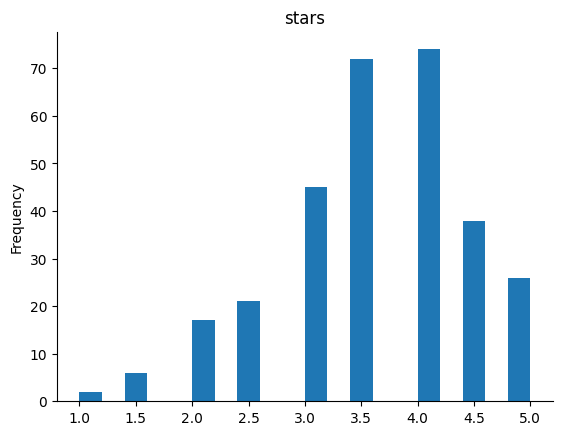

In [102]:
# @title stars

from matplotlib import pyplot as plt
hotels_in_city['stars'].plot(kind='hist', bins=20, title='stars')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [107]:
#####

In [ ]:
import pandas as pd
import json

# Load the business data from the Yelp Dataset
with open('yelp_academic_dataset_business.json', 'r', encoding='utf-8') as f:
    business_data = pd.DataFrame([json.loads(line) for line in f])

# Filter businesses categorized as restaurants
restaurants = business_data[business_data['categories'].str.contains('Restaurants', na=False)]
